In [73]:
import torch
from cpclasses import *



In [74]:
class Model(torch.nn.Module):
    def __init__(self, n_features=1, n_classes=3):
        super().__init__()
        self.fc1 = torch.nn.Linear(n_features, n_classes, bias=True)
        self.n_features = n_features
        self.n_classes = n_classes
        
    def forward(self,x):
        x = x.view(-1, 1)
        x = self.fc1(x)
        return x

    def predict_label(self, x):

        predicted_weights = self.forward(x)
        return torch.argmax(predicted_weights, dim=1)   


    def fit(self, n_epochs, data_list, labels_list):
        criterion = torch.nn.CrossEntropyLoss()


        n_epochs = 1000
        optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

        for epoch in range(n_epochs):
            optimizer.zero_grad()
            predicted_weights = model(data_list)
            labels = torch.tensor(labels_list, dtype = int)
            loss = criterion(predicted_weights, label)
            loss.backward()
            optimizer.step()

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, loss: {loss.item()}')

        print('Optimization finished with loss: ', loss.item()) 

In [75]:
model = Model()
model.fc1.weight.data[...] = torch.Tensor([[0.7], [0.25], [0.9]])
model.fc1.bias.data[...] = torch.Tensor([1, -0.4, 0.5])

In [76]:
test_P = torch.Tensor(np.arange(-6, 6.1, 2))

test_P

tensor([-6., -4., -2.,  0.,  2.,  4.,  6.])

In [77]:
predicted_weights = model(test_P)

predicted_weights

tensor([[-3.2000, -1.9000, -4.9000],
        [-1.8000, -1.4000, -3.1000],
        [-0.4000, -0.9000, -1.3000],
        [ 1.0000, -0.4000,  0.5000],
        [ 2.4000,  0.1000,  2.3000],
        [ 3.8000,  0.6000,  4.1000],
        [ 5.2000,  1.1000,  5.9000]], grad_fn=<AddmmBackward0>)

In [78]:
def f(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1, keepdim=True)

predicted_probabilities = f(predicted_weights)
predicted_probabilities

tensor([[0.2061, 0.7562, 0.0377],
        [0.3617, 0.5397, 0.0986],
        [0.4967, 0.3013, 0.2020],
        [0.5396, 0.1331, 0.3273],
        [0.4987, 0.0500, 0.4513],
        [0.4183, 0.0171, 0.5646],
        [0.3300, 0.0055, 0.6645]], grad_fn=<DivBackward0>)

In [79]:
#Gives the same resulat af torch.softmax
predicted_probabilities = torch.softmax(predicted_weights, dim=1)
predicted_probabilities

tensor([[0.2061, 0.7562, 0.0377],
        [0.3617, 0.5397, 0.0986],
        [0.4967, 0.3013, 0.2020],
        [0.5396, 0.1331, 0.3273],
        [0.4987, 0.0500, 0.4513],
        [0.4183, 0.0171, 0.5646],
        [0.3300, 0.0055, 0.6645]], grad_fn=<SoftmaxBackward0>)

In [80]:
N_labels = 7
epochs = 10000
min_H = 100
for epoch in range(epochs):
    labels = torch.randint(0, 3, (N_labels,))
    H = 0
    for i in range(len(labels)):
        H += torch.log(predicted_probabilities[i][labels[i]])
    H = -1/len(labels) * H
    if H < min_H:
        min_H = H
        print(f'{H:.4f}, {labels}')


1.2698, tensor([2, 0, 1, 0, 2, 0, 0])
1.1555, tensor([0, 0, 2, 2, 2, 0, 0])
0.9270, tensor([0, 0, 0, 2, 2, 0, 2])
0.7270, tensor([1, 0, 0, 2, 0, 0, 2])
0.6698, tensor([1, 1, 0, 0, 2, 2, 0])
0.6127, tensor([1, 1, 0, 0, 2, 0, 2])
0.5698, tensor([1, 1, 0, 0, 2, 2, 2])
0.5555, tensor([1, 1, 0, 0, 0, 2, 2])


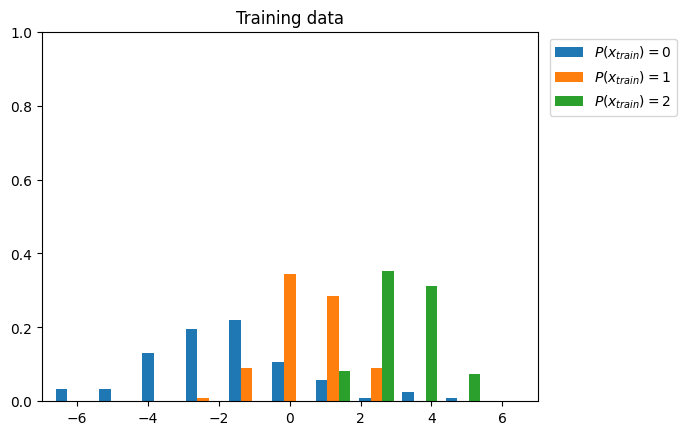

In [81]:
radii = np.array([2,1,1]).reshape(-1,3)
x0s = np.array([-2, 0.5, 3]).reshape(-1,3)
stacked_points = radii * np.random.randn(100, 3) + x0s

fig, ax = plt.subplots()

ax.hist(stacked_points, bins=10, density=True,label=[r'$P(x_{train}) = 0$', r'$P(x_{train}) = 1$', r'$P(x_{train}) = 2$'])

ax.set_title('Training data')
ax.set(xlim=(-7,7), ylim=(0,1))

ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))


save_plot(fig, 'labeling, training data.png')

In [82]:
all_points = stacked_points.flatten()
all_labels = np.array(range(stacked_points.shape[-1])) * np.ones(stacked_points.shape)
all_labels = all_labels.flatten()

Ps = torch.tensor(np.array(all_points), dtype=torch.float32)
labels = torch.tensor(np.array(all_labels), dtype=torch.long)



In [83]:
torch.softmax(model(xs), dim=1)

tensor([[0.1448, 0.8335, 0.0217],
        [0.1526, 0.8239, 0.0235],
        [0.1606, 0.8139, 0.0254],
        [0.1690, 0.8035, 0.0275],
        [0.1777, 0.7926, 0.0298],
        [0.1866, 0.7812, 0.0322],
        [0.1959, 0.7694, 0.0347],
        [0.2054, 0.7571, 0.0374],
        [0.2152, 0.7444, 0.0404],
        [0.2253, 0.7312, 0.0435],
        [0.2356, 0.7176, 0.0468],
        [0.2462, 0.7035, 0.0503],
        [0.2570, 0.6891, 0.0540],
        [0.2679, 0.6742, 0.0579],
        [0.2791, 0.6589, 0.0620],
        [0.2904, 0.6433, 0.0664],
        [0.3017, 0.6273, 0.0710],
        [0.3132, 0.6110, 0.0758],
        [0.3248, 0.5944, 0.0808],
        [0.3363, 0.5776, 0.0861],
        [0.3478, 0.5606, 0.0916],
        [0.3593, 0.5434, 0.0973],
        [0.3707, 0.5260, 0.1033],
        [0.3819, 0.5086, 0.1095],
        [0.3930, 0.4911, 0.1159],
        [0.4039, 0.4736, 0.1225],
        [0.4146, 0.4561, 0.1294],
        [0.4249, 0.4387, 0.1364],
        [0.4350, 0.4214, 0.1436],
        [0.444

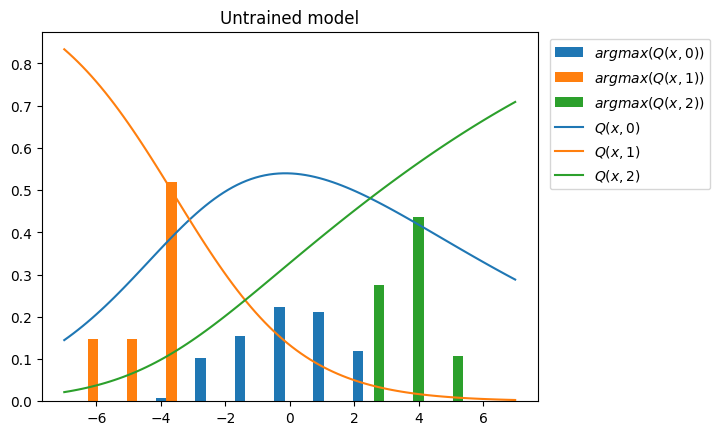

In [84]:
predicted_labels = model.predict_label(Ps)

fig, ax = plt.subplots()

ax.hist([Ps[predicted_labels == i] for i in range(3)], bins=10, density=True, label=[r'$argmax(Q(x, 0))$', r'$argmax(Q(x, 1))$', r'$argmax(Q(x, 2))$'])


xs = torch.linspace(-7, 7, 100)
for i in range(3):
    ax.plot(xs, torch.softmax(model(xs), dim=1)[:,i].detach().numpy(), label=f'$Q(x, {i})$', color=f'C{i}')

ax.set_title('Untrained model')

ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))


save_plot(fig, 'labeling, untrained model.png')

In [85]:
def cross_entropy_from_probabilities(probabilities, guessed_labels):
    probabilities_for_guessed_labels = torch.gather(probabilities,
                                                    dim=1,
                                                    index=guessed_labels.unsqueeze(1))
    cross_entropy = torch.mean(-torch.log(probabilities_for_guessed_labels))
    return cross_entropy

In [86]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

n_epochs = 1000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    predicted_weights = model(Ps)
    loss = criterion(predicted_weights, labels)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss: {loss.item()}')

Epoch 0, loss: 1.2479108572006226
Epoch 100, loss: 0.6274297833442688
Epoch 200, loss: 0.569399893283844
Epoch 300, loss: 0.5501124858856201
Epoch 400, loss: 0.5420372486114502
Epoch 500, loss: 0.5383573174476624
Epoch 600, loss: 0.5366268157958984
Epoch 700, loss: 0.5358117818832397
Epoch 800, loss: 0.5354346036911011
Epoch 900, loss: 0.5352658033370972


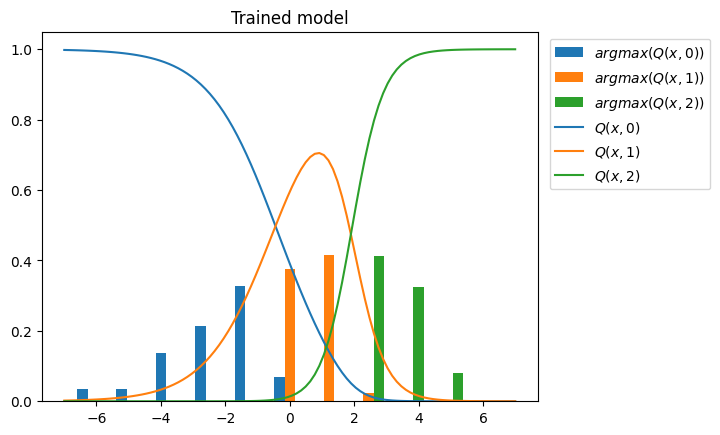

In [87]:
predicted_labels = model.predict_label(Ps)

fig, ax = plt.subplots()

ax.hist([Ps[predicted_labels == i] for i in range(3)], bins=10, density=True, label=[r'$argmax(Q(x, 0))$', r'$argmax(Q(x, 1))$', r'$argmax(Q(x, 2))$'])


xs = torch.linspace(-7, 7, 100)
for i in range(3):
    ax.plot(xs, torch.softmax(model(xs), dim=1)[:,i].detach().numpy(), label=f'$Q(x, {i})$', color=f'C{i}')

ax.set_title('Trained model')

ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

save_plot(fig, 'labeling, trained model.png')